In [16]:
# for basic operations
import numpy as np





In [17]:
# for visualizations
import matplotlib.pyplot as plt

In [18]:
import pandas as pd

In [19]:
import seaborn as sns

In [33]:
# reading the data

import warnings
warnings.filterwarnings('ignore')

reviewbycourse = pd.read_csv("course-reviews/reviews_by_course.csv")
review = pd.read_csv('course-reviews/reviews.csv')
survey = pd.read_csv('course-reviews/SurveySchema.csv')
mulresponse = pd.read_csv('course-reviews/multipleChoiceResponses.csv')

# getting the shape
print("Shape of Reviews by Course Dataset", reviewbycourse.shape)
print("Shape of Reviews Dataset", review.shape)
print("Shape of Survey Dataset", survey.shape)
print("Shape of multiple choice Response Dataset", mulresponse.shape)

Shape of Reviews by Course Dataset (140320, 3)
Shape of Reviews Dataset (107018, 3)
Shape of Survey Dataset (12, 52)
Shape of multiple choice Response Dataset (23860, 395)


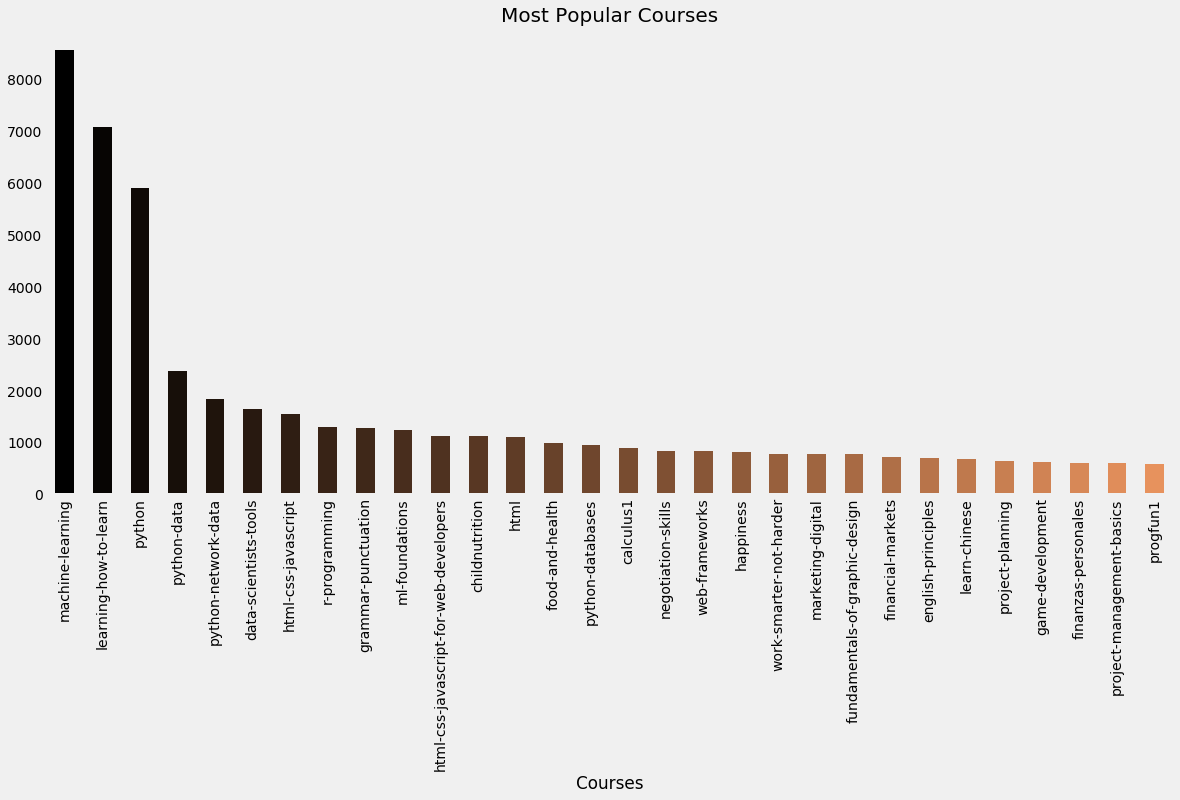

In [34]:
# looking at the most popularcourses

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('fivethirtyeight')

color = plt.cm.copper(np.linspace(0, 2, 80))
reviewbycourse['CourseId'].value_counts().head(30).plot.bar(color = color)
plt.title('Most Popular Courses', fontsize = 20, fontweight = 30)
plt.xlabel('Courses')
plt.grid()
plt.show()

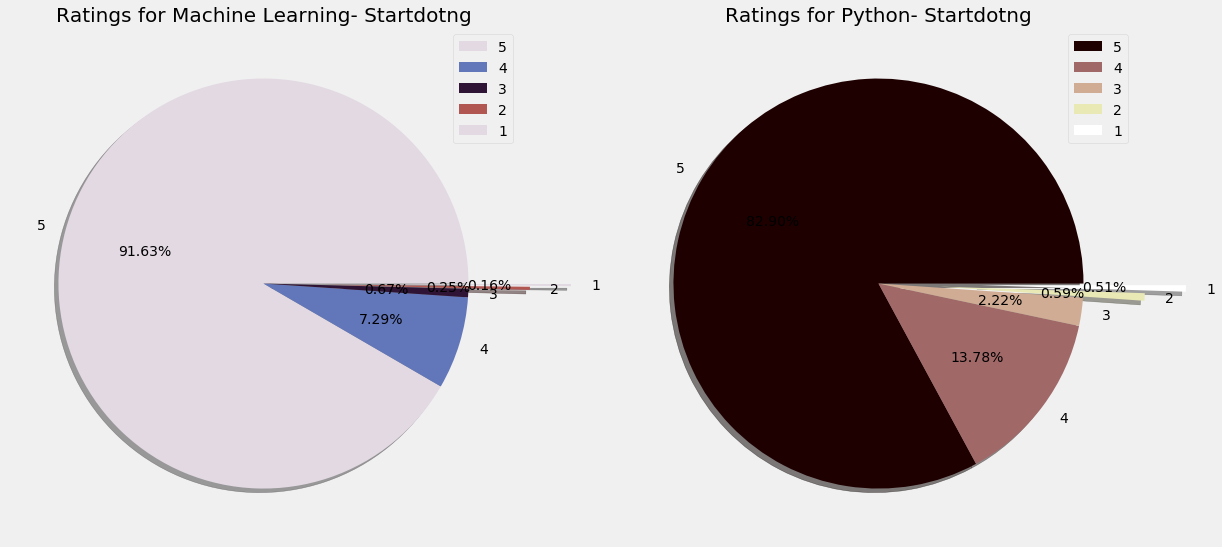

In [35]:


plt.rcParams['figure.figsize'] = (18, 10)

rating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'machine-learning']
plt.subplot(1, 2, 1)
colors = plt.cm.twilight(np.linspace(0, 1, 5))
rating.value_counts().plot.pie(colors = colors,
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Machine Learning- Startdotng', fontsize = 20)
plt.legend()

pyrating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'python']

plt.subplot(1, 2, 2)
colors = plt.cm.pink(np.linspace(0, 1, 5))
pyrating.value_counts().plot.pie(colors = colors,
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Python- Startdotng', fontsize = 20)
plt.legend()
plt.show()

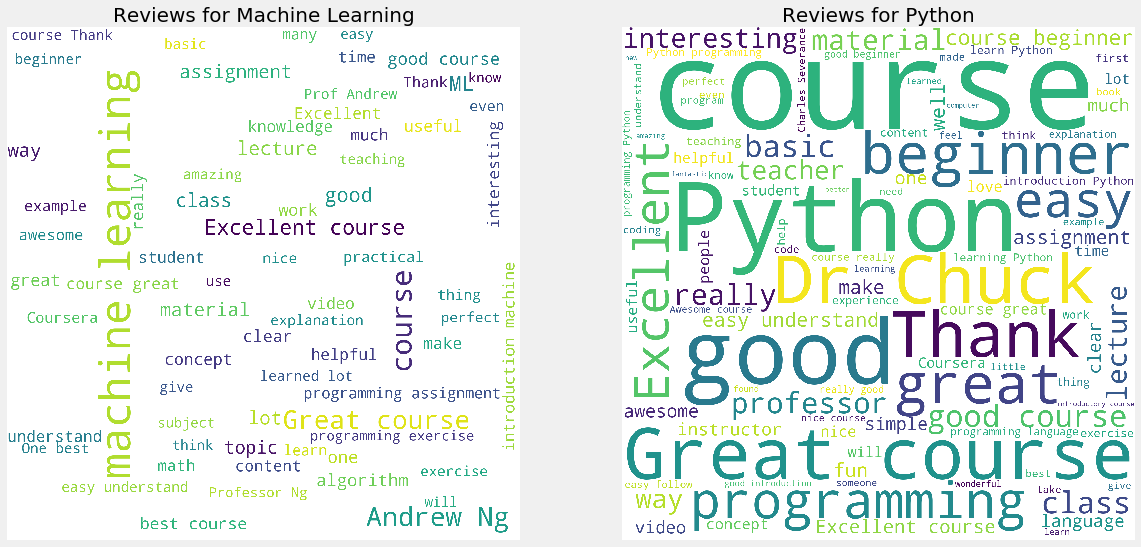

In [37]:
# let's check review for machine learning
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
reviewbycourse = pd.read_csv("course-reviews/reviews_by_course.csv")
mlreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'machine-learning']])
plt.rcParams['figure.figsize'] = (18, 18)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 70).generate(mlreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Machine Learning', fontsize = 20)

pyreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'python']])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(pyreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Python', fontsize = 20)

plt.show()

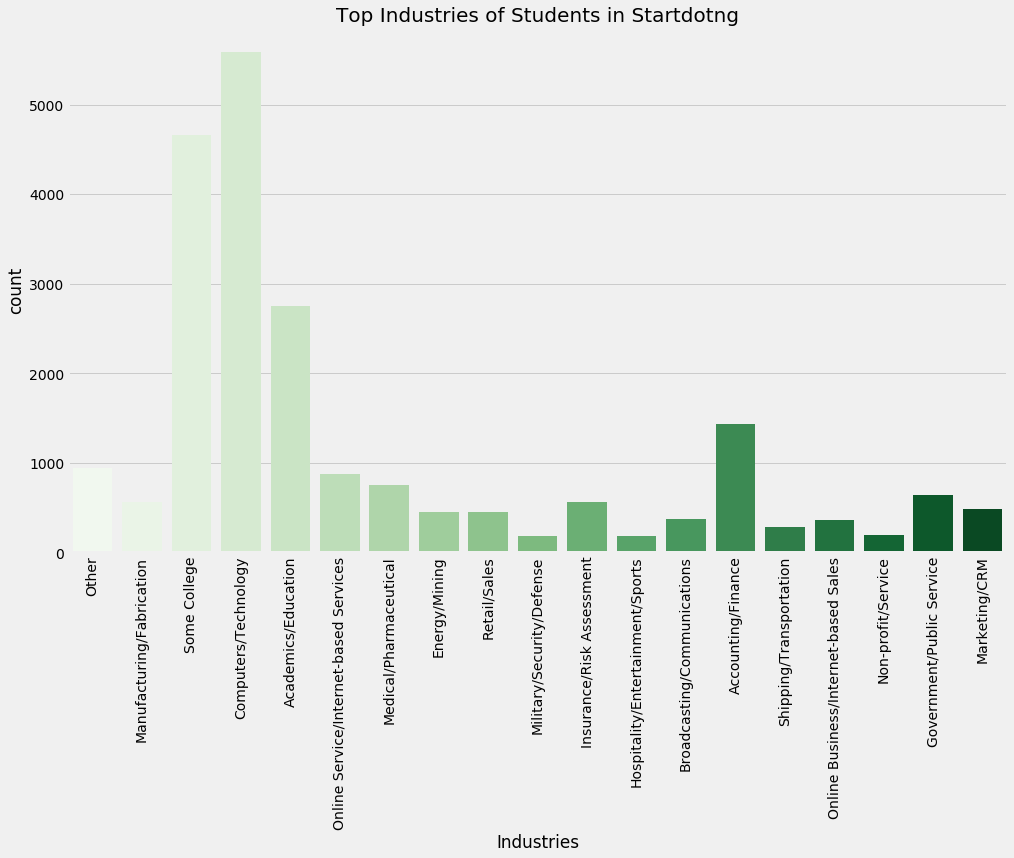

In [41]:
# data cleaning
mulresponse = pd.read_csv('course-reviews/multipleChoiceResponses.csv')
mulresponse['Q7'].replace('In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice', 'Other', inplace = True)
mulresponse['Q7'].replace('I am a student', 'Some College', inplace = True)

# countplot

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mulresponse['Q7'], palette = 'Greens')
plt.title('Top Industries of Students in Startdotng', fontsize = 20, fontweight = 30)
plt.xlabel('Industries')
plt.xticks(rotation = 90)
plt.show()

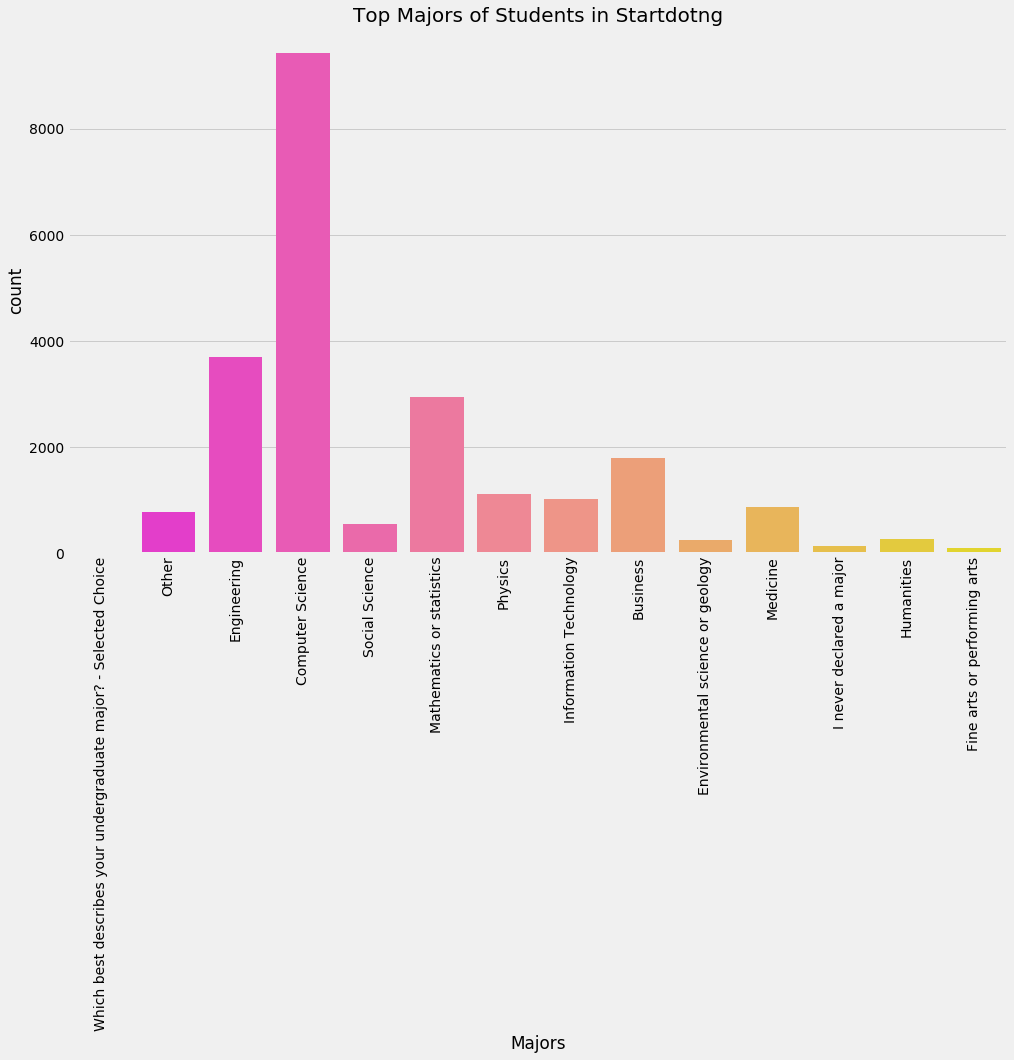

In [43]:


mulresponse['Q5'].replace('Computer science (software engineering, etc.)', 'Computer Science', inplace = True)
mulresponse['Q5'].replace('Engineering (non-computer focused)', 'Engineering', inplace = True)
mulresponse['Q5'].replace('A business discipline (accounting, economics, finance, etc.)', 'Business', inplace = True)
mulresponse['Q5'].replace('Physics or astronomy', 'Physics', inplace = True)
mulresponse['Q5'].replace('Information technology, networking, or system administration', 'Information Technology', inplace = True)
mulresponse['Q5'].replace('Medical or life sciences (biology, chemistry, medicine, etc.)', 'Medicine', inplace = True)
mulresponse['Q5'].replace('Social sciences (anthropology, psychology, sociology, etc.)', 'Social Science', inplace = True)
mulresponse['Q5'].replace('Humanities (history, literature, philosophy, etc.)', 'Humanities', inplace = True)

# countplot
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mulresponse['Q5'], palette = 'spring')
plt.title('Top Majors of Students in Startdotng', fontsize = 20, fontweight = 30)
plt.xlabel('Majors')
plt.xticks(rotation = 90)
plt.show()

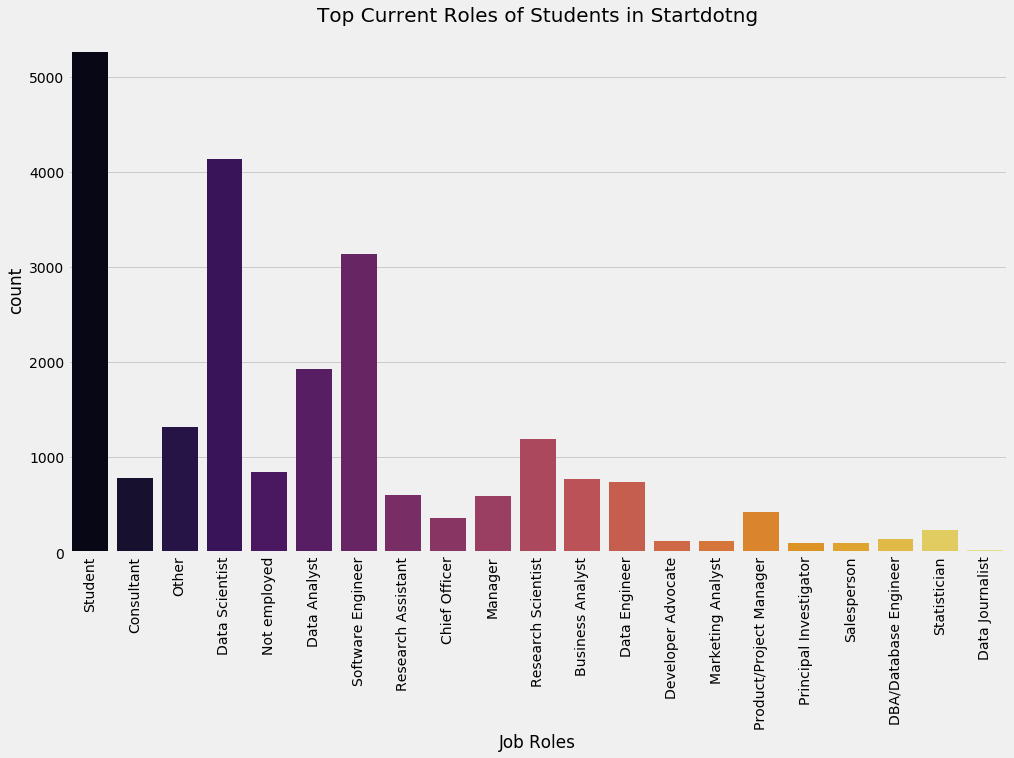

In [45]:
# data cleaning

mulresponse['Q6'].replace('Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'Student', inplace = True)

# countplot
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mulresponse['Q6'], palette = 'inferno')
plt.title('Top Current Roles of Students in Startdotng', fontsize = 20, fontweight = 30)
plt.xlabel('Job Roles')
plt.xticks(rotation = 90)
plt.show()

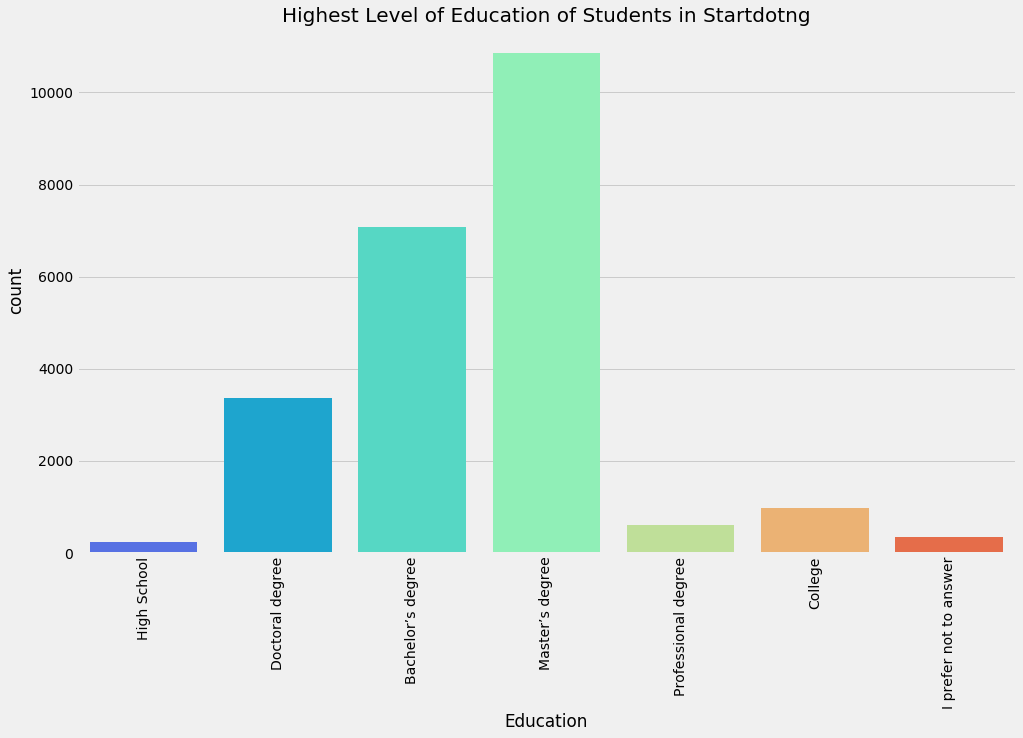

In [46]:
# data cleaning
mulresponse['Q4'].replace('No formal education past high school', 'High School', inplace = True)
mulresponse['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'College', inplace = True)
mulresponse['Q4'].replace('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'High School', inplace = True)     

# countplot
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(mulresponse['Q4'], palette = 'rainbow')
plt.title('Highest Level of Education of Students in Startdotng', fontsize = 20, fontweight = 30)
plt.xlabel('Education')
plt.xticks(rotation = 90)
plt.show()

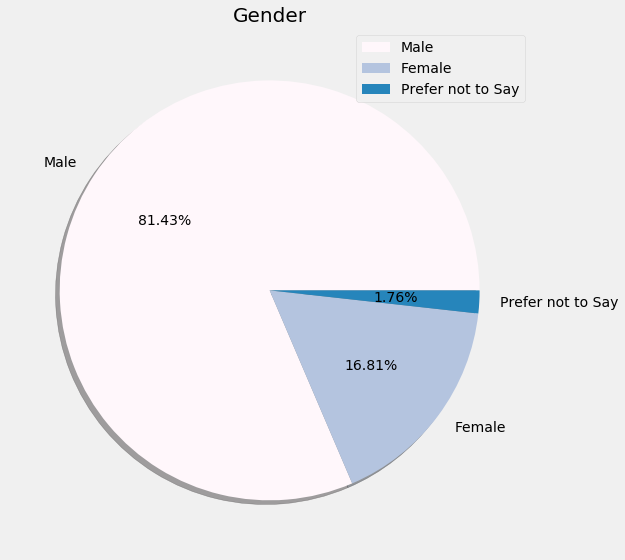

In [47]:
mulresponse['Q1'].replace('Prefer to self-describe', 'Prefer not to say', inplace = True)
mulresponse['Q1'].replace('What is your gender? - Selected Choice', 'Prefer not to say', inplace = True)

color = plt.cm.PuBu(np.linspace(0, 1, 4))
mulresponse['Q1'].value_counts().plot.pie(colors = color,
                                        labels = ['Male', 'Female', 'Prefer not to Say'],
                                        autopct = '%.2f%%',
                                        shadow = True)
plt.rcParams['figure.figsize'] = (9, 9)
plt.legend()
plt.axis('off')
plt.title('Gender', fontsize = 20, fontweight = 30)
plt.show()

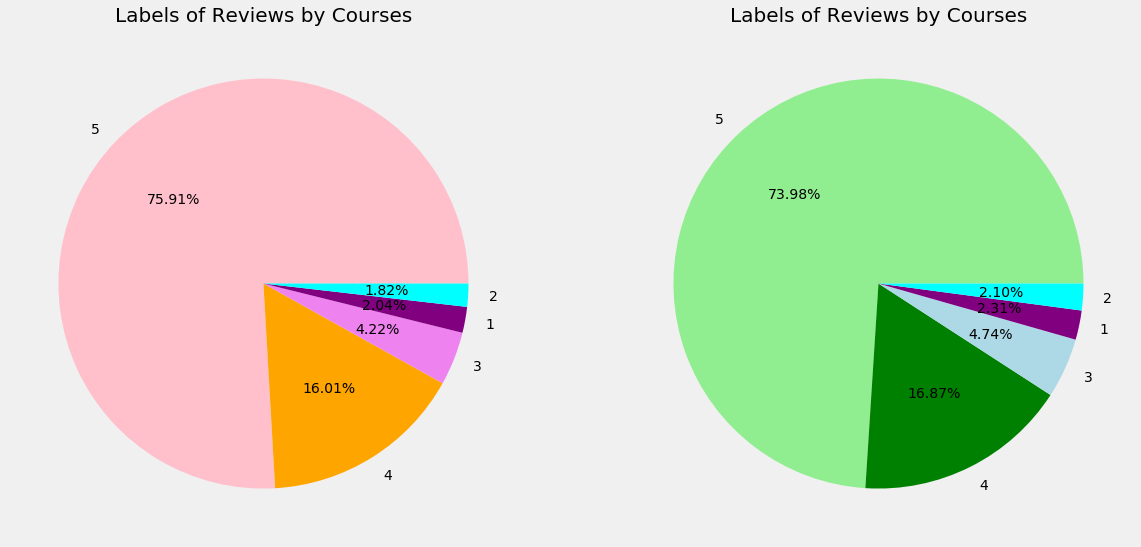

In [49]:
# checking different labels for reviews in reviews by courses
review = pd.read_csv('course-reviews/reviews.csv')
plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
reviewbycourse['Label'].value_counts().plot.pie(colors = ['pink', 'orange', 'violet', 'purple', 'cyan'],
                                                labels = ["5", "4", "3", "1", "2"],
                                                autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)
review['Label'].value_counts().plot.pie(colors = ['lightgreen', 'green', 'lightblue', 'purple', 'cyan'],
                                        labels = ["5", "4", "3", "1", "2"],
                                        autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20, fontweight = 30)

plt.show()

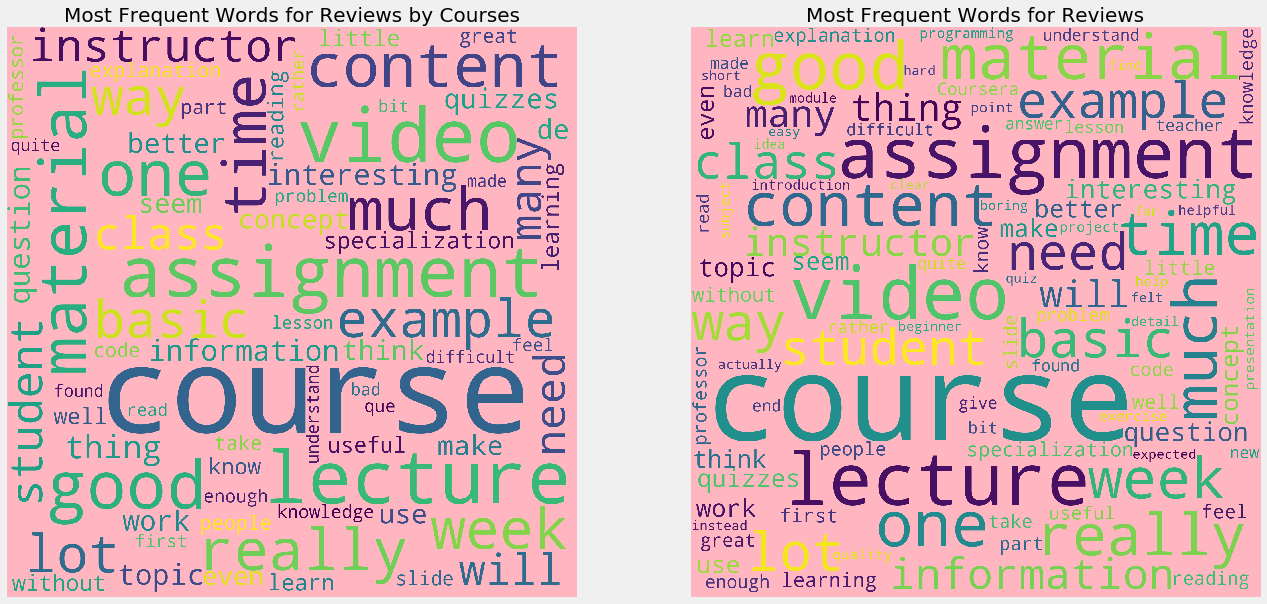

In [50]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (20, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 2]])
wordcloud = WordCloud(background_color = 'lightpink', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 2]])
wordcloud = WordCloud(background_color = 'lightpink', width = 2000, height = 2000, max_words = 100).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()


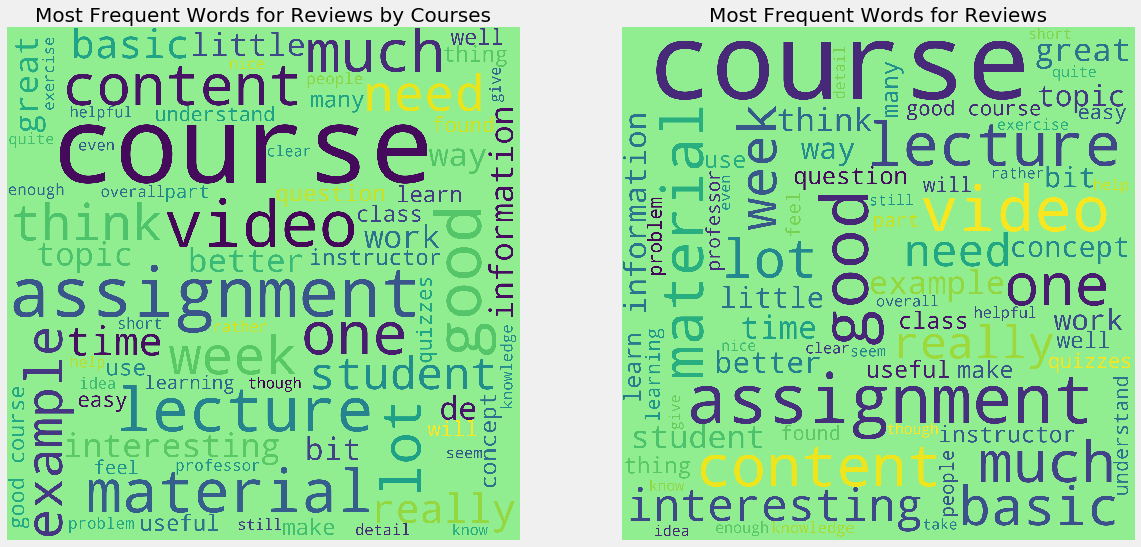

In [51]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 3]])

wordcloud = WordCloud(background_color = 'lightgreen', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 3]])
wordcloud = WordCloud(background_color = 'lightgreen', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()

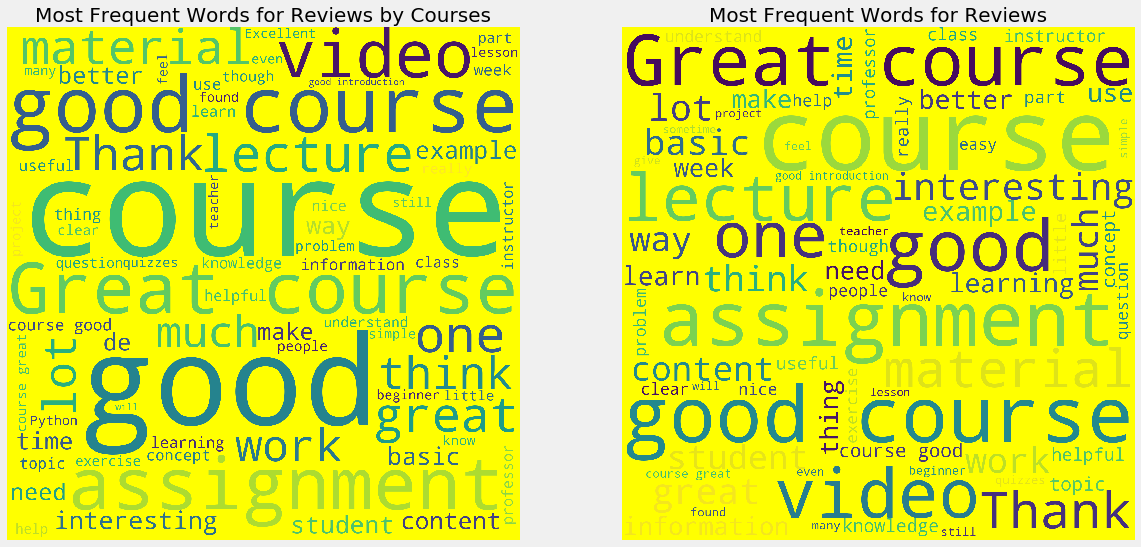

In [52]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 4]])

wordcloud = WordCloud(background_color = 'yellow', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 4]])
wordcloud = WordCloud(background_color = 'yellow', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()


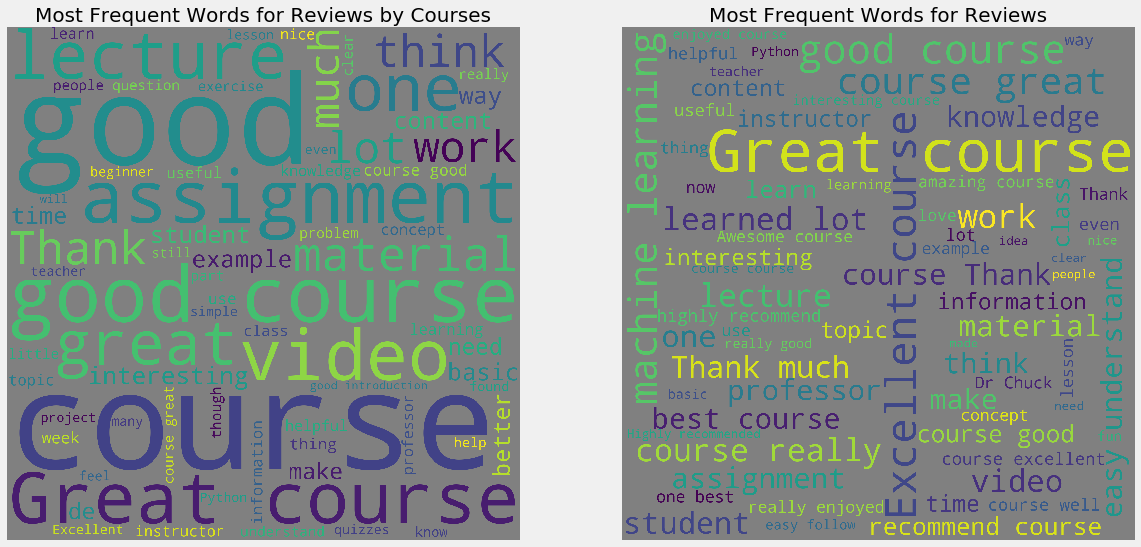

In [53]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 4]])

wordcloud = WordCloud(background_color = 'gray', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20, fontweight = 30)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 5]])
wordcloud = WordCloud(background_color = 'gray', width = 2000, height = 2000, max_words = 70).generate(label1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20, fontweight = 30)
plt.show()